**ФАКТОРНЫЙ АНАЛИЗ. МЕТОД ГЛАВНЫХ КОМПОНЕНТ**

Вариант 1

In [1049]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('LAB_DATA_MSM.csv', index_col='Дата', decimal=',')
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Дата,,,,,,,,,,,,,,,,,,,,,
20150105,196.75,33.21,935.0,0.06750,133.95,8590,142.0,2295.0,174.70,838,...,1000.5,3.625,385.7,56.37,24.240,455.5,238.00,91.44,0.1055,23.15
20150106,200.30,33.07,926.0,0.06666,138.92,9101,144.6,2345.0,179.90,845,...,1047.0,3.790,397.9,58.28,25.015,476.7,228.75,95.28,0.1195,23.43
20150108,214.95,35.17,956.0,0.06741,146.46,9550,148.1,2572.0,190.05,876,...,1060.0,3.875,403.6,65.70,26.265,483.0,245.00,90.10,0.1230,24.25
20150109,206.60,34.00,938.0,0.06531,141.70,9740,146.6,2461.0,195.00,910,...,1050.0,4.045,406.4,63.10,25.650,475.1,234.05,89.03,0.1195,23.80
20150112,204.00,34.45,935.0,0.06353,140.22,9839,143.1,2477.0,193.00,906,...,1020.0,3.885,411.9,62.90,25.450,470.7,228.25,88.80,0.1155,23.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150827,245.50,38.80,1324.0,0.06985,144.60,10371,145.5,2424.0,227.25,801,...,2280.0,4.950,300.0,73.80,34.150,599.5,306.00,79.29,0.1465,38.67
20150828,246.35,39.04,1357.0,0.06965,146.60,10430,147.6,2520.0,228.90,818,...,2370.0,4.960,302.5,74.82,34.825,613.9,313.00,81.45,0.1475,38.50
20150831,245.10,40.00,1359.0,0.06900,148.19,10569,146.9,2531.0,228.85,814,...,2370.0,4.930,300.5,74.50,34.295,633.0,323.00,81.49,0.1505,39.42


## Задание 1

Для относительных приращений, приведенных в варианте задания ценных бумаг (таблица 1), выяснить целесообразность применения факторного анализа (проверить гипотезу о зависимости рассматриваемых факторов – относительных приращений котировок ценных бумаг).

In [1050]:
# Номера ценных бумаг, вариант 1
columns = ['2', '5', '6', '13', '14', '16', '17', '20']

# Выберем необходимые ценные бумаги
my_df = df.loc[:, columns]

# Считаем относительные приращения
my_df_rel = my_df.pct_change().iloc[1:, :]

# Переименуем колонки для удобства
columns = ['AFLT', 'GAZP', 'GMNK', 'RBSM', 'RUALR', 'SNGS', 'NVTK', 'ODVA']
my_df_rel.columns = columns
my_df_rel

,AFLT,GAZP,GMNK,RBSM,RUALR,SNGS,NVTK,ODVA
Дата,,,,,,,,
20150106,-0.004216,0.037103,0.059488,0.045517,0.031631,0.031972,0.046542,0.132701
20150108,0.063502,0.054276,0.049335,0.022427,0.014325,0.049970,0.013216,0.029289
20150109,-0.033267,-0.032500,0.019895,0.043871,0.006938,-0.023415,-0.016356,-0.028455
20150112,0.013235,-0.010445,0.010164,-0.039555,0.013533,-0.007797,-0.009261,-0.033473
20150113,0.015965,0.017259,0.018904,-0.015444,0.029376,0.005894,0.039728,-0.034632
...,...,...,...,...,...,...,...,...
20150827,-0.003851,0.029108,0.007872,0.006098,-0.009901,0.031722,0.031487,0.006873
20150828,0.006186,0.013831,0.005689,0.002020,0.008333,0.019766,0.024020,0.006826
20150831,0.024590,0.010846,0.013327,-0.006048,-0.006612,-0.015219,0.031113,0.020339


**Критерий сферичности Бартлетта**


$H_0​:Σ=I$ (факторы независимы)


$
\chi^2 = -\left(n - 1 - \frac{2p + 5}{6}\right) \ln |\mathbf{R}|
$


где:

* n — число наблюдений;

* p — число переменных;

* R — корреляционная матрица.

$\chi^2_{\text{набл.}} \leq \chi^2_{\text{крит.}}$ - переменные независимы.

Число степеней свободы: $df = \frac{p(p-1)}{2}$.

In [1051]:
# Функция для расчета статистики критерия сферичности Бартлетта
def bartlett(X, alpha = 0.05):
  # Корреляционная матрица
  R = X.corr().values
  p = R.shape[0]
  n = len(X)

  # Определитель
  det_R = np.linalg.det(R)

  # Статистика Бартлетта
  chi_square = -(n - 1 - (2*p + 5)/6) * np.log(det_R)

  # Степени свободы
  df_bartlett = p*(p-1)/2

  # Квантиль
  chi_crit = chi2.ppf(1 - alpha, df_bartlett)

  return chi_square, chi_crit

In [1052]:
# В дальнейшем X - выборка относительных приращений интересующих нас компаний
X = deepcopy(my_df_rel)

bartlett, chi_crit = bartlett(X)

print(f'Статистика Бартлетта: {bartlett}')
print(f'Квантиль хи-2: {chi_crit}')

if bartlett <= chi_crit:
  print('Принимается нулевая гипотеза, факторы независимы')
else:
  print('Принимается альтеративная гипотеза, факторы зависимы')

Статистика Бартлетта: 338.7831633292779
Квантиль хи-2: 41.33713815142739
Принимается альтеративная гипотеза, факторы зависимы


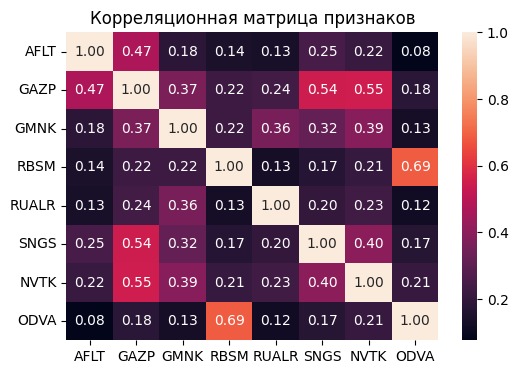

In [1053]:
# Найдем корреляционную матрицу
R = X.corr().values
plt.figure(figsize=(6, 4))
sns.heatmap(R, annot=True, fmt='.2f', xticklabels=columns, yticklabels=columns)
plt.title('Корреляционная матрица признаков')
plt.show()

Таким образом, проведение факторного анализа целесообразно.

## Задание 2

Провести факторный анализ относительных приращений методом главных компонент.

a) Найти собственные значения и собственные векторы выборочной матрицы
ковариаций, упорядоченные по убыванию собственных значений. Определить
количество обобщенных факторов (главных компонент), ориентируясь на долю
выделенной дисперсии, а также руководствуясь критериями Кайзера и Кэттелла
(каменистой осыпи). Оценить долю общей дисперсии объясняемой каждым
обобщенным фактором (главной компонентой) и совокупностью обобщенных
факторов (двух, трех и т.д.).

In [1054]:
# Для начала нормируем и центрируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=scaler.get_feature_names_out()).head()

,AFLT,GAZP,GMNK,RBSM,RUALR,SNGS,NVTK,ODVA
0,-0.227777,2.075080,2.632369,1.057350,1.217400,1.228763,2.303634,3.146404
1,2.864298,3.049483,2.172497,0.488447,0.577636,1.973343,0.583213,0.640090
2,-1.554308,-1.874388,0.838977,1.016788,0.304525,-1.062601,-0.943391,-0.759396
3,0.569058,-0.622897,0.398198,-1.038721,0.548367,-0.416488,-0.577128,-0.881000
4,0.693708,0.949043,0.794092,-0.444657,1.134045,0.149916,1.951863,-0.909096


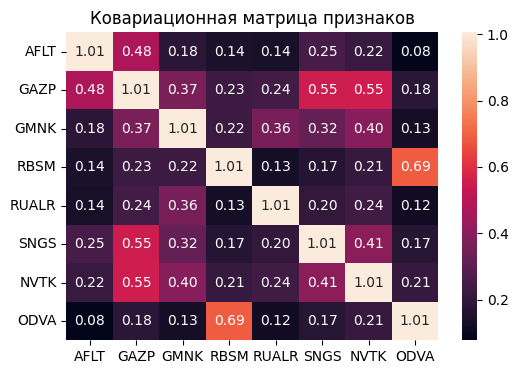

In [1055]:
# Найдем ковариационную матрицу
A = np.cov(X, rowvar=False)
plt.figure(figsize=(6, 4))
sns.heatmap(A, annot=True, fmt='.2f', xticklabels=columns, yticklabels=columns)
plt.title('Ковариационная матрица признаков')
plt.show()

In [1056]:
# Найдем собственные векторы и собственные значения
eigh_vals, beta_eigh_vecs = np.linalg.eigh(A)
beta_eigh_vecs = beta_eigh_vecs.T

# Нормируем собственные векторы в соответствии с условием нормировки
for i in range(len(eigh_vals)):
  beta_eigh_vecs[i] /= eigh_vals[i]**0.5

eigh_tuples = list(zip(eigh_vals, beta_eigh_vecs))

# Сортировка по убыванию собственных значений
eigh_tuples.sort(key=lambda x: x[0], reverse=True)

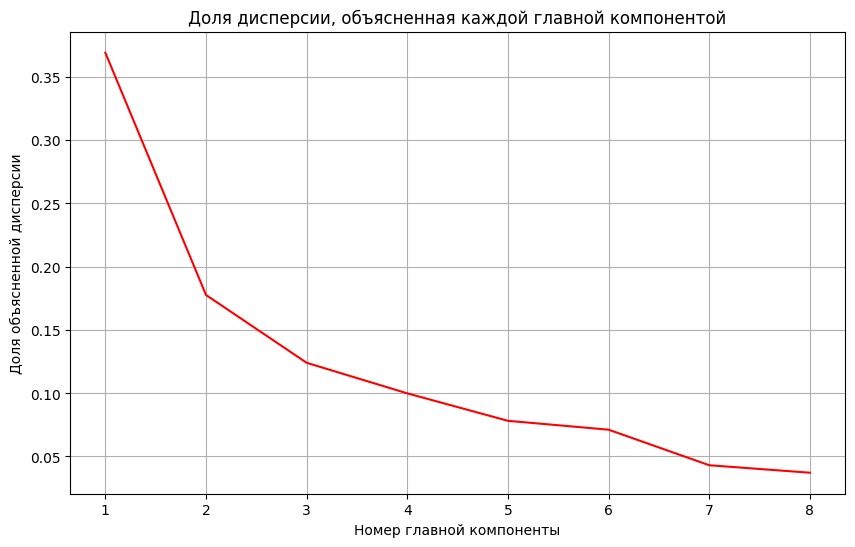

In [1057]:
# Доля дисперсии, объясняемая каждой главной компонентой
sorted_eigh_vals = sorted(eigh_vals, reverse=True)
prop_dct = {num+1: sorted_eigh_vals[num]/sum(sorted_eigh_vals) for num in range(len(sorted_eigh_vals))}

plt.figure(figsize=(10, 6))
sns.lineplot(prop_dct, color='red')
plt.title('Доля дисперсии, объясненная каждой главной компонентой')
plt.xticks(range(1, 9))
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

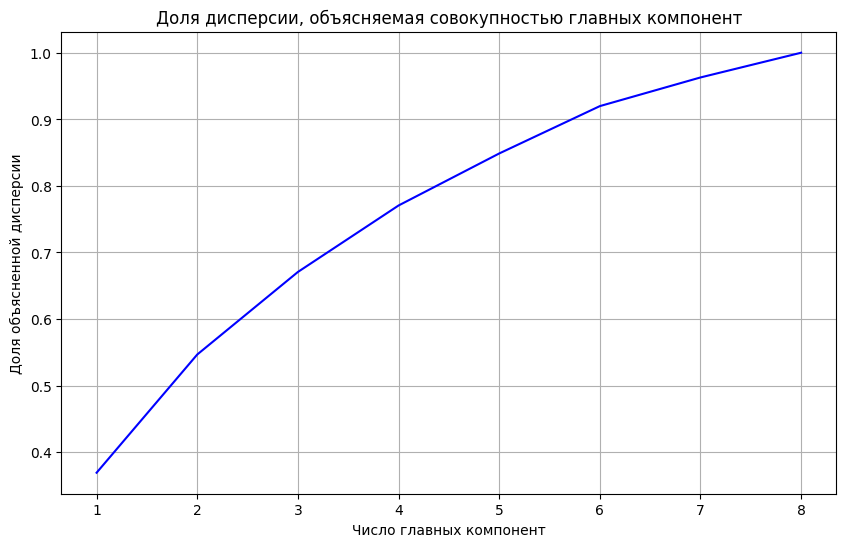

In [1058]:
# Доля дисперсии, объясняемая совокупностью главных компонент
cumulative_prop_dct = {num+1: sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals) for num in range(len(sorted_eigh_vals))}

plt.figure(figsize=(10, 6))
sns.lineplot(cumulative_prop_dct, color='blue')
plt.title('Доля дисперсии, объясняемая совокупностью главных компонент')
plt.xticks(range(1, 9))
plt.xlabel('Число главных компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

Определим количество обобщенных факторов.

1) По доле выделенной дисперсии

In [1059]:
# Доля выделенной дисперсии (0.8)
num = 1
while sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals) < 0.8:
  num += 1
print(f'Число компонент: {num}')
print(f'Доля объясненной дисперсии: {sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals)}')

Число компонент: 4
Доля объясненной дисперсии: 0.8486303030595453


2. Критерий Кайзера

In [1060]:
# Критерий Кайзера
num = int(sum(np.array(sorted_eigh_vals) > 1))
print(f'Число компонент: {num}')
print(f'Доля объясненной дисперсии: {sum(sorted_eigh_vals[:num+1])/sum(sorted_eigh_vals)}')

Число компонент: 2
Доля объясненной дисперсии: 0.6706145595095286


3. Критерий Кэттелла (каменистой осыпи)

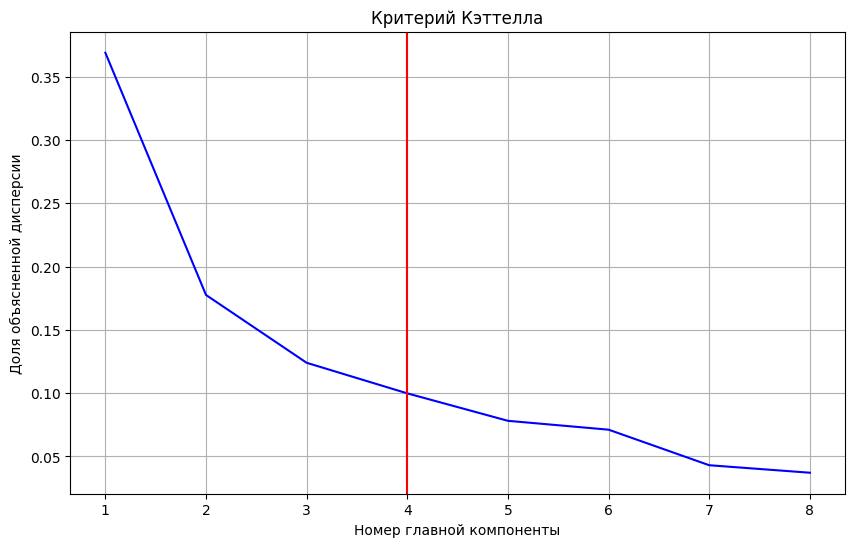

In [1061]:
# Критерий Кэттелла
plt.figure(figsize=(10, 6))
sns.lineplot(prop_dct, color='blue')
plt.axvline(4, color='red')
plt.title('Критерий Кэттелла')
plt.xticks(range(1, 9))
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

В целом, целесообразно выделить 4 обобщенных фактора.

In [1062]:
factors_num = 4

b) Записать выражения для обобщенных факторов через исходные признаки и получить
оценки векторов значений обобщенных факторов по всем наблюдениям.

In [1063]:
for j in range(factors_num):
  eigh_vec = eigh_tuples[j][1]
  eigh_vec_str = [f'({round(eigh_vec[i], 2)})*{columns[i]}' for i in range(len(eigh_vec))]
  print(f'Z{j+1} = ', end='')
  print(*eigh_vec_str, sep=' + ')

Z1 = (-0.17)*AFLT + (-0.27)*GAZP + (-0.21)*GMNK + (-0.18)*RBSM + (-0.16)*RUALR + (-0.23)*SNGS + (-0.24)*NVTK + (-0.16)*ODVA
Z2 = (-0.18)*AFLT + (-0.19)*GAZP + (-0.11)*GMNK + (0.52)*RBSM + (-0.09)*RUALR + (-0.16)*SNGS + (-0.12)*NVTK + (0.55)*ODVA
Z3 = (0.5)*AFLT + (0.27)*GAZP + (-0.45)*GMNK + (0.04)*RBSM + (-0.67)*RUALR + (0.15)*SNGS + (-0.02)*NVTK + (0.05)*ODVA
Z4 = (0.77)*AFLT + (-0.05)*GAZP + (-0.03)*GMNK + (0.1)*RBSM + (0.5)*RUALR + (-0.42)*SNGS + (-0.46)*NVTK + (-0.01)*ODVA


In [1064]:
B = np.array([eigh_tuples[j][1] for j in range(factors_num)]).T
Z = pd.DataFrame(X @ B, columns=[f'Z{i+1}' for i in range(factors_num)])
Z.head()

,Z1,Z2,Z3,Z4
0,-2.795525,1.039405,-1.229862,-1.259164
1,-2.627094,-1.168957,1.217757,1.213109
2,0.944824,0.908765,-1.998563,0.028521
3,0.462563,-0.962399,-0.564753,1.080278
4,-0.987242,-1.480862,-0.605775,0.028055


c) Получить оценки векторов факторных нагрузок и записать разложение для исходных
признаков через обобщенные и характерные факторы.

In [1065]:
# Матрица факторных нагрузок
alpha_eigh_vecs = np.array([eigh_tuples[j][0]*eigh_tuples[j][1] for j in range(factors_num)])

In [1066]:
for j in range(len(columns)):
  eigh_vec = alpha_eigh_vecs.T[j]
  eigh_vec_str = [f'({round(eigh_vec[i], 2)})*Z{i+1}' for i in range(factors_num)] + [f'eps_{j+1}']
  print(f'{columns[j]} = ', end='')
  print(*eigh_vec_str, sep=' + ')

AFLT = (-0.51)*Z1 + (-0.25)*Z2 + (0.5)*Z3 + (0.62)*Z4 + eps_1
GAZP = (-0.79)*Z1 + (-0.28)*Z2 + (0.27)*Z3 + (-0.04)*Z4 + eps_2
GMNK = (-0.63)*Z1 + (-0.16)*Z2 + (-0.45)*Z3 + (-0.02)*Z4 + eps_3
RBSM = (-0.54)*Z1 + (0.74)*Z2 + (0.04)*Z3 + (0.08)*Z4 + eps_4
RUALR = (-0.47)*Z1 + (-0.13)*Z2 + (-0.67)*Z3 + (0.4)*Z4 + eps_5
SNGS = (-0.67)*Z1 + (-0.23)*Z2 + (0.15)*Z3 + (-0.34)*Z4 + eps_6
NVTK = (-0.71)*Z1 + (-0.17)*Z2 + (-0.02)*Z3 + (-0.37)*Z4 + eps_7
ODVA = (-0.49)*Z1 + (0.78)*Z2 + (0.05)*Z3 + (-0.01)*Z4 + eps_8


d) Для каждого исходного признака оценить долю дисперсии, объясняемой каждым
обобщенным фактором и всей совокупностью обобщенных факторов. Оценить
дисперсии характерных факторов.

In [1067]:
print('=========================================================================')
for j in range(len(columns)):
  cur_sum = 0
  for i in range(factors_num):
    cur_sum += alpha_eigh_vecs[i][j]**2
    print(f'Доля дисперсии {columns[j]}, объясняемая Z{i+1}: {alpha_eigh_vecs[i][j]**2}')
  print(f'Доля дисперсии, объясняемая совокупностью всех обобщенных факторов {round(cur_sum, 2)}')
  print(f'Оценка дисперсии характерных факторов: {round(np.std(X[:, j]) - cur_sum, 2)}')
  print('=========================================================================')

Доля дисперсии AFLT, объясняемая Z1: 0.25543475395325654
Доля дисперсии AFLT, объясняемая Z2: 0.06285348161263861
Доля дисперсии AFLT, объясняемая Z3: 0.2500370282521604
Доля дисперсии AFLT, объясняемая Z4: 0.3807113917438651
Доля дисперсии, объясняемая совокупностью всех обобщенных факторов 0.95
Оценка дисперсии характерных факторов: 0.05
Доля дисперсии GAZP, объясняемая Z1: 0.6247788292720218
Доля дисперсии GAZP, объясняемая Z2: 0.07681416238383457
Доля дисперсии GAZP, объясняемая Z3: 0.07061695184365253
Доля дисперсии GAZP, объясняемая Z4: 0.0016207220797160857
Доля дисперсии, объясняемая совокупностью всех обобщенных факторов 0.77
Оценка дисперсии характерных факторов: 0.23
Доля дисперсии GMNK, объясняемая Z1: 0.3933803232190471
Доля дисперсии GMNK, объясняемая Z2: 0.02519881538154528
Доля дисперсии GMNK, объясняемая Z3: 0.20404665977841596
Доля дисперсии GMNK, объясняемая Z4: 0.0004353078344354318
Доля дисперсии, объясняемая совокупностью всех обобщенных факторов 0.62
Оценка диспе

## Задание 3

Провести интерпретацию первых двух факторов, проведя при необходимости вращение факторов (в пространстве двух факторов), используя метод варимакс. Указать определяющие признаки для каждого фактора и их коэффициент информативности до вращения и после вращения.

In [1068]:
factors = []

for j in range(2):

  eigh_vec = eigh_tuples[j][1]
  factors.append(eigh_vec)

  eigh_vec_str = [f'({round(eigh_vec[i], 2)})*{columns[i]}' for i in range(len(eigh_vec))]
  print(f'Z{j+1} = ', end='')
  print(*eigh_vec_str, sep=' + ')

Z1 = (-0.17)*AFLT + (-0.27)*GAZP + (-0.21)*GMNK + (-0.18)*RBSM + (-0.16)*RUALR + (-0.23)*SNGS + (-0.24)*NVTK + (-0.16)*ODVA
Z2 = (-0.18)*AFLT + (-0.19)*GAZP + (-0.11)*GMNK + (0.52)*RBSM + (-0.09)*RUALR + (-0.16)*SNGS + (-0.12)*NVTK + (0.55)*ODVA


In [1069]:
# Коэффициенты преобразования beta
Z1_beta = np.array(factors[0])
Z2_beta = np.array(factors[1])

print(f'Коэффициенты преобразования beta для Z1: {Z1_beta}', end='\n\n')
print(f'Коэффициенты преобразования beta для Z2: {Z2_beta}')

Коэффициенты преобразования beta для Z1: [-0.17016902 -0.26613602 -0.2111771  -0.18047699 -0.15721582 -0.22606583
 -0.23879511 -0.16400827]

Коэффициенты преобразования beta для Z2: [-0.1753849  -0.19388677 -0.11104975  0.52012975 -0.09243749 -0.16072299
 -0.11715409  0.54794483]


In [1070]:
# Векторы факторных нагрузок
Z1_alpha = alpha_eigh_vecs[0, :]
Z2_alpha = alpha_eigh_vecs[1, :]

print(f'Вектор факторных нагрузок alpha для Z1: {Z1_alpha}', end='\n\n')
print(f'Вектор факторных нагрузок alpha для Z2: {Z2_alpha}')

Вектор факторных нагрузок alpha для Z1: [-0.50540553 -0.79042952 -0.62720039 -0.5360204  -0.46693425 -0.67142022
 -0.70922643 -0.48710797]

Вектор факторных нагрузок alpha для Z2: [-0.25070597 -0.27715368 -0.15874135  0.74350545 -0.13213583 -0.22974732
 -0.16746727  0.78326604]


In [1071]:
# Функция для расчета коэффициента информативности
def calculate_ic(all_factor_loadings, subset_indices):
    """
    args:
    all_factor_loadings - вектор факторных нагрузок
    subset_indices - список индексов признаков, для которых рассчитывается коэффициент информативности

    returns:
    K_u - коэффициент информативности
    """

    K_u = np.sum(all_factor_loadings[subset_indices]**2) / np.sum(all_factor_loadings**2)

    return K_u

Алгоритм отбора признаков в группу: последовательно включать в группу признаки с наибольшим коэффициентом информативности, пока коэффициент информативности группы признаков не превысит порог.

In [1072]:
# Функция, автоматизирующая отбор признаков с наибольшим коэффициентом информативности
def select_features_ic(all_factor_loadings, threshhold = 0.7):

  features_indeces = [] # Список индексов отобранных признаков
  ic_lst = [] # коэффициенты информативности отобранных признаков

  for i in range(len(all_factor_loadings)):

    # Если превысили заданный порог, прекращаем добавлять новые признаки
    if calculate_ic(all_factor_loadings, features_indeces) >= threshhold:
      return features_indeces, ic_lst

    # Текущий максимальный коэффициент информативности среди неотобранных признаков
    cur_max_ic = 0
    cur_max_ind = 0

    for feature_index in range(len(all_factor_loadings)):

      if (calculate_ic(all_factor_loadings, [feature_index]) > cur_max_ic) and (feature_index not in features_indeces):

        cur_max_ic = calculate_ic(all_factor_loadings, [feature_index])
        cur_max_ind = feature_index

    features_indeces.append(cur_max_ind)
    ic_lst.append(cur_max_ic)

  return features_indeces, ic_lst

In [1073]:
# Индексы важных признаков для Z1
Z1_indeces, Z1_ic = select_features_ic(Z1_alpha, threshhold=0.6)

# Индексы важных признаков для Z2
Z2_indeces, Z2_ic = select_features_ic(Z2_alpha, threshhold=0.6)

In [1074]:
def print_importance_list(indeces, features, ic_lst):
  number = 1
  for idx in indeces:
    print(f'{number}: {features[idx]} (K_u = {ic_lst[number - 1]})')
    number += 1

In [1075]:
# Наиболее значимые признаки для Z_1, отранжированные по коэффициенту информативности
print_importance_list(Z1_indeces, columns, Z1_ic)

1: GAZP (K_u = 0.21036177032092643)
2: NVTK (K_u = 0.169359799577091)
3: SNGS (K_u = 0.1517851708942496)
4: GMNK (K_u = 0.13245036055110568)


In [1076]:
# Наиболее значимые признаки для Z_2, отранжированные по коэффициенту информативности
print_importance_list(Z2_indeces, columns, Z2_ic)

1: ODVA (K_u = 0.42918657822365835)
2: RBSM (K_u = 0.38671930333241683)


Интерпретация результатов.

Фактор $Z_1$:

1: GAZP - ПАО 'Газпром';

2: NVTK - ПАО 'НОВАТЭК';

3: SNGS - ПАО 'Сургутнефтегаз';

4: GMNK - ПАО 'ГМК Норильский никель'.

Таким образом, обобщенный фактор $Z_1$ агрегирует главным образом информацию о рынке нефтедобывающей промышленности.

Фактор $Z_2$:

1: ODVA - 'Медиахолдинг';

2: RBSM - 'ПАО РБК'.

Второй фактор агрегирует информацию о рынке медийных компаний.